<a href="https://colab.research.google.com/github/0DianaHernandez/Simulacion-I/blob/main/Metodo_composicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de Composición**

Permite generar variables aleatorias x cuando éstas provienen de una función de densidad $f(x)$ que puede expresarse como la combinación convexa de $m$ distribuciones de probabilidad $f(x)$. Entonces, la combinación convexa se puede expresar como:

$$f(x)=\sum_{i=1}^{m} f_i(x)I_A(x)$$

Donde:
$$
I_A(x) =
\begin{cases}
      1 & \text{si } (x \in A)\\
      0 & \text{si } (x \notin A)\\
   \end{cases}
$$
*¡NOTA!* : Algunas de las distribuciones más conocidas que pueden expresarse como una combinaión convexa son: la triangular, la de Laplace y la trapezoidal.





*Procedimiento:*

El procedimiento general de generación es el siguiente:

1. Calcule la probabilidad de cada una de las distribuciones $f_i(x)$.
2. Asegúrese que cada función $f_i(x)$ sea función de densidad.
3. Obtenga, mediante el método de la transformada inversa, las expresiones para generar variables aleatorias de cada una de las distribuciones $f_i(x)$
4. Genere un número pseudoaleatorio $r_i$ que permita definir el valor de $l_A(x)$.
5. Seleccione la función generadora correspondiente a la función $f_i(x)$.
6. Genere un segundo número pseudoaleatorio $r_i$ y sustitúyalo en la función generadora anterior para obtener $Y$.


In [5]:
#Importamos Librerias
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

In [10]:
#Para éste caso realizaremos un ejercicio de distribución triángular

#Parámetros:
a = 5 #Mínimo
c = 10 #Media
b = 20 #Máximo

In [42]:
def Funcion_densidad_Triangular(x, a, b, c):
    f_x = np.zeros_like(x)  # Inicializar arreglo para almacenar valores de la fdp

    # Calcular la fdp para cada punto en x
    for i in range(len(x)):
        if (x[i] >= a) and (x[i] <= c):
            f_x[i] = 2 * (x[i] - a) / ((b - a) * (c - a))
        elif (x[i] > c) and (x[i] <= b):
            f_x[i] = 2 * (b - x[i]) / ((b - a) * (b - c))
        else:
            f_x[i] = 0

    return f_x


In [49]:
#Funcion acumulativa
def Funcion_acumulativa_triangular(x, a, b, c):
  F_x=np.zeros_like(x)
    # Calcular la función acumulativa para cada punto en x
  for i in range(len(x)):
        if x[i] < a:
            F_x[i] = 0
        elif (x[i] >= a) and (x[i] <= c):
            F_x[i] = ((x[i] - a)**2) / ((b - a) * (c - a))
        elif (x[i] > c) and (x[i] <= b):
            F_x[i] = 1 - ((b - x[i])**2) / ((b - a) * (b - c))
        elif x[i] > b:
            F_x[i] = 1

  return F_x

Para una distribución triangular, la función de densidad de probabilidad (fdp) puede ser dividida en dos regiones:

* La primera región es donde $a≤x≤c$: Linea scendente
* La segunda región es donde $c<x≤b$: Linea descendente

Para generar una variable aleatoria X que siga una distribución triangular, usamos la transformada inversa. De donde sabemos que:

* Para $U< ((c-a)/(b-a))$

  $X=a+ \sqrt {U(b-a)(c-a)}$

* Para $U≥ ((c-a)/(b-a))$

  $X=b- \sqrt {(1-U)(b-a)(b-c)}$



In [21]:
#Definimos la funcion con la que generaremos las muestras
def Generacion_Muestras(n, a, b, c):
    muestra = np.zeros(n) #llenará con los valores generados siguiendo la distribución triangular
    for i in range(n):
        u = np.random.rand()
        if u < (c - a) / (b - a):
            muestra[i] = a + np.sqrt(u * (b - a) * (c - a))
        else:
            muestra[i] = b - np.sqrt((1 - u) * (b - a) * (b - c))
    return muestra


In [24]:
n = 10000  # Tamaño de la muestra
x = np.linspace(a, b, 1000)

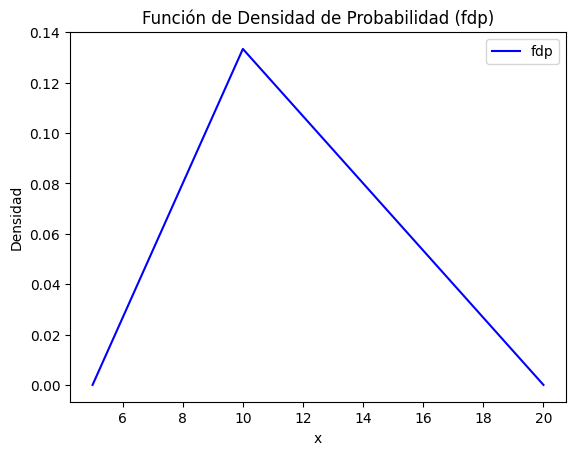

In [43]:
# Calcular la fdp para los puntos en x
pdf = Funcion_densidad_Triangular(x, a, b, c)

# Gráfica de la fdp
plt.plot(x, pdf, label='fdp', color='blue')
plt.title('Función de Densidad de Probabilidad (fdp)')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()

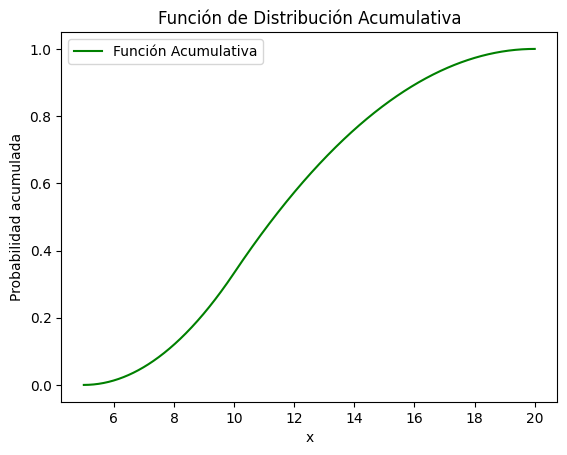

In [50]:
#Gráfica distribucion acumulativa
plt.plot(x, Funcion_acumulativa_triangular(x, a, b, c), label='Función Acumulativa', color='green')
plt.title('Función de Distribución Acumulativa')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.show()


In [51]:
#generamos la muestra
muestra = Generacion_Muestras(n, a, b, c)


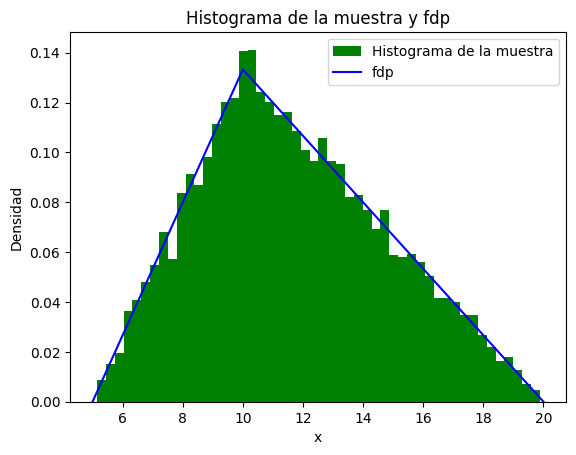

In [60]:
#Gráficamos el histograma
plt.hist(muestra, bins=50, density=True,color='g', label='Histograma de la muestra') #Histograma de las muestras
plt.plot(x, Funcion_densidad_Triangular(x, a, b, c), label='fdp', color='blue')#Para ver que tan cercano esta a la distribución
plt.title('Histograma de la muestra y fdp')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()
